start
Defining Data generator
Found 12227 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Defining Model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)         

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25


2023-04-24 16:06:35.896079: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


192/192 [==============================] - 543s 3s/step - loss: 2.8839 - accuracy: 0.0842 - val_loss: 2.7536 - val_accuracy: 0.1172
Epoch 2/25
192/192 [==============================] - 501s 3s/step - loss: 2.2783 - accuracy: 0.2459 - val_loss: 1.9816 - val_accuracy: 0.3383
Epoch 3/25
192/192 [==============================] - 505s 3s/step - loss: 1.6984 - accuracy: 0.4397 - val_loss: 1.3337 - val_accuracy: 0.5807
Epoch 4/25
192/192 [==============================] - 497s 3s/step - loss: 1.1145 - accuracy: 0.6349 - val_loss: 0.8538 - val_accuracy: 0.7275
Epoch 5/25
192/192 [==============================] - 502s 3s/step - loss: 0.7487 - accuracy: 0.7631 - val_loss: 0.7137 - val_accuracy: 0.7615
Epoch 6/25
192/192 [==============================] - 501s 3s/step - loss: 0.5101 - accuracy: 0.8403 - val_loss: 0.4276 - val_accuracy: 0.8723
Epoch 7/25
192/192 [==============================] - 490s 3s/step - loss: 0.4085 - accuracy: 0.8725 - val_loss: 0.4258 - val_accuracy: 0.8645
Epoch 8/25

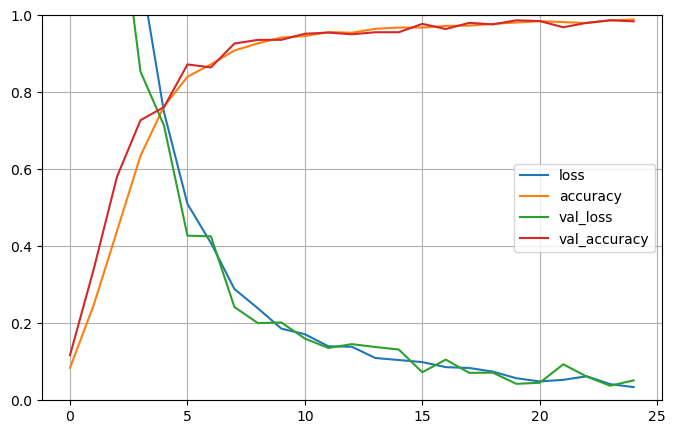

The End


In [1]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Defining Data generator")

datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.4)
train_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=64)

valid_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=32, subset='validation')

test_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                          target_size=(150, 150), 
                                          batch_size=32, 
                                          subset='validation')

print("Defining Model")

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, 
                              kernel_size=(3,3), 
                              activation='relu', 
                              strides=(1,1), 
                              input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Reshape((-1, 64)))

model.add(keras.layers.Bidirectional(keras.layers.GRU(64, activation='tanh', return_sequences=True)))
model.add(keras.layers.Bidirectional(keras.layers.GRU(128, activation='tanh', return_sequences=True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.GRU(64, activation='tanh')))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

print("Model Fitting")

checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_BiGRU_Model.h5', save_best_only=True)

history = model.fit_generator(train_dataset, epochs=30, validation_data=valid_dataset, callbacks = [checkpoint_cb])

print(model.evaluate(test_dataset))
#model.save("CNN_model.h5")

print("Plotting Graph")

df_hist = pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (8,5))
df_hist.to_csv('History_CNN_BiGRU.csv')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("CNN_BiGRU_graph.png")
plt.show()

print("The End")

start
Defining Data generator
Found 12227 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Defining Model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)         

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25


2023-05-12 10:27:27.890664: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


192/192 [==============================] - 538s 3s/step - loss: 2.7531 - accuracy: 0.1295 - val_loss: 2.2360 - val_accuracy: 0.2713
Epoch 2/25
192/192 [==============================] - 492s 3s/step - loss: 1.9363 - accuracy: 0.3498 - val_loss: 1.7732 - val_accuracy: 0.4160
Epoch 3/25
192/192 [==============================] - 497s 3s/step - loss: 1.4957 - accuracy: 0.5060 - val_loss: 1.3652 - val_accuracy: 0.5309
Epoch 4/25
192/192 [==============================] - 492s 3s/step - loss: 1.0423 - accuracy: 0.6637 - val_loss: 1.0675 - val_accuracy: 0.6637
Epoch 5/25
192/192 [==============================] - 489s 3s/step - loss: 0.7435 - accuracy: 0.7586 - val_loss: 0.8137 - val_accuracy: 0.7318
Epoch 6/25
192/192 [==============================] - 488s 3s/step - loss: 0.6049 - accuracy: 0.8079 - val_loss: 0.4978 - val_accuracy: 0.8498
Epoch 7/25
192/192 [==============================] - 486s 3s/step - loss: 0.5311 - accuracy: 0.8355 - val_loss: 0.4937 - val_accuracy: 0.8469
Epoch 8/25

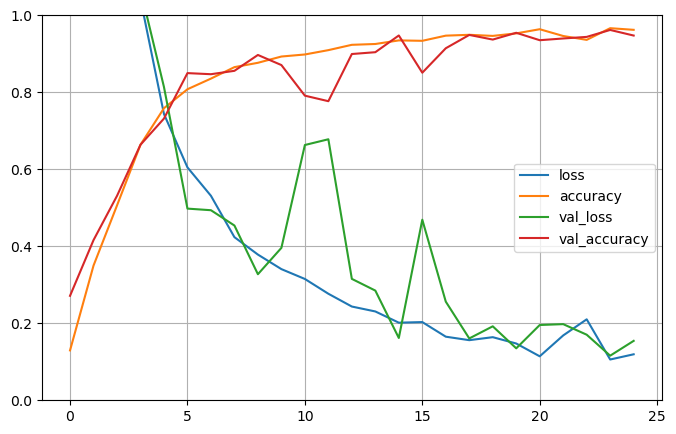

The End


In [1]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
# from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Defining Data generator")

datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.4)
train_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=64)

valid_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=32, subset='validation')

test_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                          target_size=(150, 150), 
                                          batch_size=32, 
                                          subset='validation')

print("Defining Model")

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, 
                              kernel_size=(3,3), 
                              activation='relu', 
                              strides=(1,1), 
                              input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Reshape((-1, 64)))

model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, activation='tanh', return_sequences=True)))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(128, activation='tanh', return_sequences=True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, activation='tanh')))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

print("Model Fitting")

checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_BiLSTM_Model.h5', save_best_only=True)

history = model.fit_generator(train_dataset, epochs=25, validation_data=valid_dataset, callbacks = [checkpoint_cb])

print(model.evaluate(test_dataset))
#model.save("CNN_model.h5")

print("Plotting Graph")

df_hist = pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (8,5))
df_hist.to_csv('History_CNN_BiLSTM.csv')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("CNN_BiLSTM_graph.png")
plt.show()

print("The End")

start
Defining Data generator
Found 12227 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Defining Model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dro

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25


2023-05-02 17:09:11.139281: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


192/192 [==============================] - 526s 3s/step - loss: 2.4437 - accuracy: 0.2608 - val_loss: 1.4672 - val_accuracy: 0.5559
Epoch 2/25
192/192 [==============================] - 497s 3s/step - loss: 0.9346 - accuracy: 0.7220 - val_loss: 0.4448 - val_accuracy: 0.8930
Epoch 3/25
192/192 [==============================] - 503s 3s/step - loss: 0.3799 - accuracy: 0.8923 - val_loss: 0.1961 - val_accuracy: 0.9486
Epoch 4/25
192/192 [==============================] - 495s 3s/step - loss: 0.2411 - accuracy: 0.9328 - val_loss: 0.1319 - val_accuracy: 0.9650
Epoch 5/25
192/192 [==============================] - 506s 3s/step - loss: 0.1738 - accuracy: 0.9524 - val_loss: 0.1148 - val_accuracy: 0.9695
Epoch 6/25
192/192 [==============================] - 511s 3s/step - loss: 0.1541 - accuracy: 0.9544 - val_loss: 0.0649 - val_accuracy: 0.9832
Epoch 7/25
192/192 [==============================] - 507s 3s/step - loss: 0.1026 - accuracy: 0.9710 - val_loss: 0.0510 - val_accuracy: 0.9865
Epoch 8/25

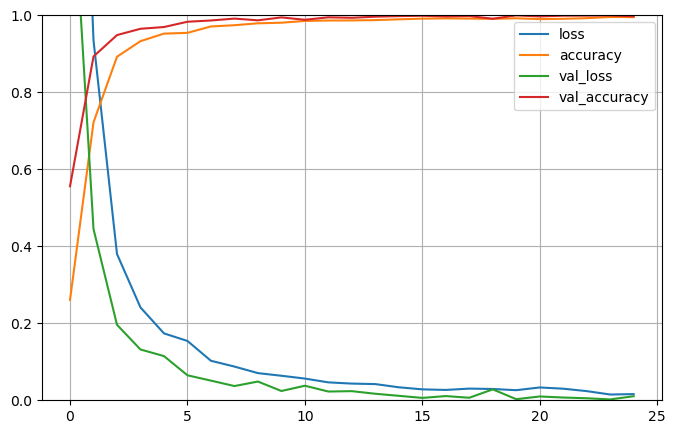

The End


In [1]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
# from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Defining Data generator")

datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.4)
train_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=64)

valid_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=32, subset='validation')

test_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                          target_size=(150, 150), 
                                          batch_size=32, 
                                          subset='validation')

print("Defining Model")

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 
                              kernel_size=(3,3), 
                              activation='relu', 
                              strides=(1,1), 
                              input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

print("Model Fitting")

checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_Model.h5', save_best_only=True)

history = model.fit_generator(train_dataset, epochs=25, validation_data=valid_dataset, callbacks = [checkpoint_cb])

print(model.evaluate(test_dataset))
#model.save("CNN_model.h5")

print("Plotting Graph")

df_hist = pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (8,5))
df_hist.to_csv('History_CNN.csv')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("CNN_graph.png")
plt.show()

print("The End")

start
Defining Data generator
Found 12227 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Defining Model
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25


2023-05-02 21:02:22.705787: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


192/192 [==============================] - 574s 3s/step - loss: 2.9968 - accuracy: 0.0518 - val_loss: 2.9936 - val_accuracy: 0.0461
Epoch 2/25
192/192 [==============================] - 576s 3s/step - loss: 2.9944 - accuracy: 0.0544 - val_loss: 2.9920 - val_accuracy: 0.0537
Epoch 3/25
192/192 [==============================] - 580s 3s/step - loss: 2.9938 - accuracy: 0.0558 - val_loss: 2.9905 - val_accuracy: 0.0844
Epoch 4/25
192/192 [==============================] - 578s 3s/step - loss: 2.9924 - accuracy: 0.0578 - val_loss: 2.9886 - val_accuracy: 0.0684
Epoch 5/25
192/192 [==============================] - 582s 3s/step - loss: 2.9909 - accuracy: 0.0589 - val_loss: 2.9869 - val_accuracy: 0.0832
Epoch 6/25
192/192 [==============================] - 580s 3s/step - loss: 2.9892 - accuracy: 0.0597 - val_loss: 2.9853 - val_accuracy: 0.1078
Epoch 7/25
192/192 [==============================] - 567s 3s/step - loss: 2.9872 - accuracy: 0.0652 - val_loss: 2.9836 - val_accuracy: 0.0809
Epoch 8/25

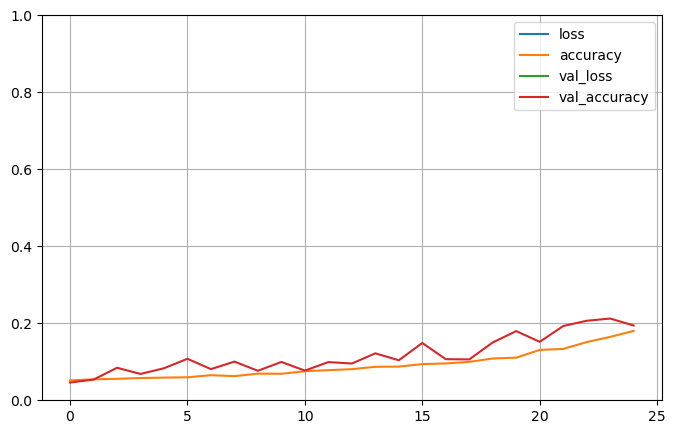

The End


In [2]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
# from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Defining Data generator")

datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.4)
train_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=64)

valid_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=32, subset='validation')

test_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                          target_size=(150, 150), 
                                          batch_size=32, 
                                          subset='validation')

print("Defining Model")

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 
                              kernel_size=(3,3), 
                              activation='relu', 
                              strides=(1,1), 
                              input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adagrad(1e-3), metrics=['accuracy'])

print("Model Fitting")

checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_Adagrad_Model.h5', save_best_only=True)

history = model.fit_generator(train_dataset, epochs=25, validation_data=valid_dataset, callbacks = [checkpoint_cb])

print(model.evaluate(test_dataset))
#model.save("CNN_model.h5")

print("Plotting Graph")

df_hist = pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (8,5))
df_hist.to_csv('History_Adagrad_CNN.csv')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("CNN_Adagrad_graph.png")
plt.show()

print("The End")

In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

print('File Loading')

df = pd.read_csv("/kaggle/input/eeg-biometric-competition/Enrollment_Info.csv")

y = []
for subid in df['subject']:
    if subid == 'sub021':
        break
    y.append(subid)
y = np.array(pd.get_dummies(y))
print(y.shape, y)

x = []

for epochid in df['EpochID']:
    if epochid == 'epoch012228':
        break
    annots = loadmat('/kaggle/input/eeg-biometric-competition/Enrollment/'+epochid+'.mat')
    wave = annots['epoch_data']
    wave = np.array(wave[:-1])
    x.append(wave.T)

x = np.array(x)

print('X shape=',x.shape, 'Y shape=', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print('Model Training')

model = keras.models.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.GRU(512, activation='tanh', return_sequences=True), input_shape=(1000, 64)))
model.add(keras.layers.Bidirectional(keras.layers.GRU(256, activation='tanh', return_sequences = True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.GRU(256, activation='tanh', return_sequences = True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.GRU(128, activation='tanh')))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('BiGRU_Model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=30, validation_split=(x_test, y_test), callbacks=[checkpoint_cb])

print('Plotting Model Graph')

df_hist = pd.DataFrame(history.history)
df_hist.to_csv("BiGRU_History.csv")
df_hist.plot(figsize = (8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('BiGRU_graph.png')
plt.show()

print('The End')

In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

print('File Loading')

df = pd.read_csv("/kaggle/input/eeg-biometric-competition/Enrollment_Info.csv")

y = []
for subid in df['subject']:
    if subid == 'sub021':
        break
    y.append(subid)
y = np.array(pd.get_dummies(y))
print(y.shape, y)

x = []

for epochid in df['EpochID']:
    if epochid == 'epoch012228':
        break
    annots = loadmat('/kaggle/input/eeg-biometric-competition/Enrollment/'+epochid+'.mat')
    wave = annots['epoch_data']
    wave = np.array(wave[:-1])
    x.append(wave.T)

x = np.array(x)

print('X shape=',x.shape, 'Y shape=', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print('Model Training')

model = keras.models.Sequential()
model.add(keras.layers.Bidirectiornal(keras.layers.LSTM(512, activation='tanh', return_sequences=True), input_shape=(1000, 64)))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(256, activation='tanh', return_sequences = True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(256, activation='tanh', return_sequences = True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(128, activation='tanh')))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('BiLSTM_Model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=30, validation_split=(x_test, y_test), callbacks=[checkpoint_cb])

print('Plotting Model Graph')

df_hist = pd.DataFrame(history.history)
df_hist.to_csv("BiLSTM_History.csv")
df_hist.plot(figsize = (8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('BiLSTM_graph.png')
plt.show()

print('The End')

In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

print('File Loading')

df = pd.read_csv("/kaggle/input/eeg-biometric-competition/Enrollment_Info.csv")

y = []
for subid in df['subject']:
    if subid == 'sub021':
        break
    y.append(subid)
y = np.array(pd.get_dummies(y))
print(y.shape, y)

x = []

for epochid in df['EpochID']:
    if epochid == 'epoch012228':
        break
    annots = loadmat('/kaggle/input/eeg-biometric-competition/Enrollment/'+epochid+'.mat')
    wave = annots['epoch_data']
    wave = np.array(wave[:-1])
    x.append(wave.T)

x = np.array(x)

print('X shape=',x.shape, 'Y shape=', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print('Model Training')

model = keras.models.Sequential()
model.add(keras.layers.GRU(128, activation='tanh', return_sequences=True, input_shape=(1000, 64)))
model.add(keras.layers.GRU(512, activation='tanh', return_sequences = True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GRU(256, activation='tanh', return_sequences = True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GRU(64, activation='tanh'))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('GRU_Model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=30, validation_split=(x_test, y_test), callbacks=[checkpoint_cb])

print('Plotting Model Graph')

df_hist = pd.DataFrame(history.history)
df_hist.to_csv("GRU_History.csv")
df_hist.plot(figsize = (8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('GRU_graph.png')
plt.show()

print('The End')

In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

print('File Loading')

df = pd.read_csv("/kaggle/input/eeg-biometric-competition/Enrollment_Info.csv")

y = []
for subid in df['subject']:
    if subid == 'sub021':
        break
    y.append(subid)
y = np.array(pd.get_dummies(y))
print(y.shape, y)

x = []

for epochid in df['EpochID']:
    if epochid == 'epoch012228':
        break
    print(epochid)
    annots = loadmat('/kaggle/input/eeg-biometric-competition/Enrollment/'+epochid+'.mat')
    wave = annots['epoch_data']
    wave = np.array(wave[:-1])
    x.append(wave.T)

x = np.array(x)

print('X shape=',x.shape, 'Y shape=', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print('Model Training')

model = keras.models.Sequential()
model.add(keras.layers.LSTM(128, activation='tanh', return_sequences=True, input_shape=(1000, 64)))
model.add(keras.layers.LSTM(512, activation='tanh', return_sequences = True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.LSTM(256, activation='tanh', return_sequences=True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.LSTM(128, activation='tanh'))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('LSTM_Model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=30, validation_split=(x_test, y_test), callbacks=[checkpoint_cb])
model.save("LSTM_model.h5")

print('Plotting Model Graph')

df_hist = pd.DataFrame(history.history)
df_hist.to_csv("LSTM_History.csv")
df_hist.plot(figsize = (8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('LSTM_graph.png')
plt.show()

print('The End')

In [1]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Defining Data generator")

datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.2)
test_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                          target_size=(150, 150), 
                                          batch_size=32, 
                                          subset='validation')

model_cnn = keras.models.load_model('/kaggle/input/cnn-models/CNN_model.h5')

start
Defining Data generator
Found 2432 images belonging to 20 classes.


In [2]:
image = []
label = []
x=0
for data in test_dataset:
    if x==100:
        break
    x+=1
    print(data[0].shape, data[1].shape, x)
    for i in range(data[0].shape[0]):
        image.append(data[0][i])
        label.append(np.argmax(data[1][i]))

(32, 150, 150, 3) (32, 20) 1
(32, 150, 150, 3) (32, 20) 2
(32, 150, 150, 3) (32, 20) 3
(32, 150, 150, 3) (32, 20) 4
(32, 150, 150, 3) (32, 20) 5
(32, 150, 150, 3) (32, 20) 6
(32, 150, 150, 3) (32, 20) 7
(32, 150, 150, 3) (32, 20) 8
(32, 150, 150, 3) (32, 20) 9
(32, 150, 150, 3) (32, 20) 10
(32, 150, 150, 3) (32, 20) 11
(32, 150, 150, 3) (32, 20) 12
(32, 150, 150, 3) (32, 20) 13
(32, 150, 150, 3) (32, 20) 14
(32, 150, 150, 3) (32, 20) 15
(32, 150, 150, 3) (32, 20) 16
(32, 150, 150, 3) (32, 20) 17
(32, 150, 150, 3) (32, 20) 18
(32, 150, 150, 3) (32, 20) 19
(32, 150, 150, 3) (32, 20) 20
(32, 150, 150, 3) (32, 20) 21
(32, 150, 150, 3) (32, 20) 22
(32, 150, 150, 3) (32, 20) 23
(32, 150, 150, 3) (32, 20) 24
(32, 150, 150, 3) (32, 20) 25
(32, 150, 150, 3) (32, 20) 26
(32, 150, 150, 3) (32, 20) 27
(32, 150, 150, 3) (32, 20) 28
(32, 150, 150, 3) (32, 20) 29
(32, 150, 150, 3) (32, 20) 30
(32, 150, 150, 3) (32, 20) 31
(32, 150, 150, 3) (32, 20) 32
(32, 150, 150, 3) (32, 20) 33
(32, 150, 150, 3) (

In [3]:
y_pred = []
x=1
for i in image:
    print(x)
    x+=1
    y_pred.append(np.argmax(model_cnn.predict(i.reshape(1, 150, 150, 3))))

1
1/1 [==============================] - 0s 378ms/step
2
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 31ms/step
4
1/1 [==============================] - 0s 30ms/step
5
1/1 [==============================] - 0s 31ms/step
6
1/1 [==============================] - 0s 32ms/step
7
1/1 [==============================] - 0s 30ms/step
8
1/1 [==============================] - 0s 30ms/step
9
1/1 [==============================] - 0s 29ms/step
10
1/1 [==============================] - 0s 33ms/step
11
1/1 [==============================] - 0s 31ms/step
12
1/1 [==============================] - 0s 33ms/step
13
1/1 [==============================] - 0s 34ms/step
14
1/1 [==============================] - 0s 28ms/step
15
1/1 [==============================] - 0s 31ms/step
16
1/1 [==============================] - 0s 28ms/step
17
1/1 [==============================] - 0s 31ms/step
18
1/1 [==============================] - 0s 30ms/step
19
1/1 [==========

In [2]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

print('File Loading')

df = pd.read_csv("/kaggle/input/eeg-biometric-competition/Enrollment_Info.csv")

y = []
for subid in df['subject']:
    if subid == 'sub021':
        break
    y.append(subid)
y = np.array(pd.get_dummies(y))
print(y.shape, y)

x = []

for epochid in df['EpochID']:
    if epochid == 'epoch012228':
        break
    print(epochid)
    annots = loadmat('/kaggle/input/eeg-biometric-competition/Enrollment/'+epochid+'.mat')
    wave = annots['epoch_data']
    wave = np.array(wave[:-1])
    x.append(wave.T)

x = np.array(x)

print('X shape=',x.shape, 'Y shape=', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

start
File Loading
(12227, 20) [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
epoch000001
epoch000002
epoch000003
epoch000004
epoch000005
epoch000006
epoch000007
epoch000008
epoch000009
epoch000010
epoch000011
epoch000012
epoch000013
epoch000014
epoch000015
epoch000016
epoch000017
epoch000018
epoch000019
epoch000020
epoch000021
epoch000022
epoch000023
epoch000024
epoch000025
epoch000026
epoch000027
epoch000028
epoch000029
epoch000030
epoch000031
epoch000032
epoch000033
epoch000034
epoch000035
epoch000036
epoch000037
epoch000038
epoch000039
epoch000040
epoch000041
epoch000042
epoch000043
epoch000044
epoch000045
epoch000046
epoch000047
epoch000048
epoch000049
epoch000050
epoch000051
epoch000052
epoch000053
epoch000054
epoch000055
epoch000056
epoch000057
epoch000058
epoch000059
epoch000060
epoch000061
epoch000062
epoch000063
epoch000064
epoch000065
epoch000066
epoch000067
epoch000068
epoch000069
epoch000070
epoch0000

In [4]:
model_bigru = keras.models.load_model('/kaggle/input/bidirectional-models/BiGRU_Model.h5')
model_bilstm = keras.models.load_model('/kaggle/input/bidirectional-models/BiLSTM_Model.h5')

In [19]:
y_pred = model_bilstm.predict(x_test)

77/77 [==============================] - 84s 1s/step


In [20]:
pred = []

for i in y_pred:
    pred.append(np.argmax(i))
len(pred)

2446

In [21]:
test = []

for i in y_test:
    test.append(np.argmax(i))
len(test)

2446

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns

In [23]:
accuracy_score(test, pred)

0.830744071954211

In [24]:
precision_score(test, pred, average='weighted')

0.8364234861300572

In [25]:
recall_score(test, pred, average='weighted')

0.830744071954211

In [26]:
f1_score(test, pred, average='weighted')

0.8313827289632488

In [ ]:
tf.keras.utils.plot_model(model_cnn, to_file='CNN_arch.png', show_shapes=True)